Written By: Dr. Sibt ul Hussain

Implemented By: Ali Hussain.
## Goal

Your goal in this assigment is to implement a KNN Classifier.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install nose

Lets suppose there are $m$ examples of size $d$, which are stored in a training matrix $D$ of size $m \times d$. Now if we use Euclidean distance for the finding the best match for a given test example  $q_{d\times1}$ how many multiplications and additions we will need to perform ?

In [ ]:
#Write you answer here
#to calculate distance between points, we will need for m examples d number of subtractions, then we take square of those values, which cna be done using bit shifts, then we add d-1 number of squared values
# then we calculate square root of those values.
# so total number of operations will be m*d for multiplication i think
# and total number of additions will be m * (d-1)
# and total number of subtractions will be m*d

Here you will be implementing three versions of KNN classifiers, those are:
 1. Using two nested loops, i.e. for a given example you will have to compute its L2 distance with all the training samples, thus you will need to implement it using two nested loops...**Please first complete the assignment using this method and then go for further optimizations mentioned in step 2 and 3**
 2. Using one loop, i.e. you can get rid of one loop using the numpy vectorization (tiling the test example).
 3. The number of multiplications and additions can be reduced a lot if we use an alternate definition of Euclidean distance, i.e. $$||x-y||^2=||x||^2+||y||^2-2x^Ty$$
instead of using the traditional definition $$||x-y||^2=\sum_i (x_i-y_i)^2$$ This definition will help you to implement a very fast version of KNN classifier without using any loop whatsoever.

#### HelpFul Functions
You might find following functions to be extremely helpful
 - **[argpartition] (http://docs.scipy.org/doc/numpy/reference/generated/numpy.argpartition.html)** uses introselect algorithm to perform an indirect partition along the given axis. This can lead to O(n) complexity instead of O(nlogn). Remember indexing start from 0.
 - **[itemfreq]()** a function that returns a 2-D array of item frequencies.

### K Nearest Neighbour Classifier

Now in this assignment we will be implementing the K Nearest Neighbour Classifier for Continuous attributes.


In [ ]:
%pylab inline
import scipy.stats
from collections import defaultdict
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload
%autoreload 2
import numpy as np
import time

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from enum import unique
# TODO: You have to implement the following class
## Your code goes here...

class KNearestNeighbor:
    ''' Implements the KNearest Neigbours For Classification... '''
    def __init__(self, k, scalefeatures=False):
        self.k=k
        self.scalefeatures=scalefeatures
        self.X_train=None
        self.Y_train=None
        self.xmin=None
        self.xmax=None
        self.num_train = None

        pass

    def compute_distances_two_loops(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using a nested loop over both the training data and the
        test data.

        Input:
        X - An num_test x dimension array where each row is a test point.

        Output:
        dists - A num_test x num_train array where dists[i, j] is the distance
                between the ith test point and the jth training point.
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                dists[i,j]=np.linalg.norm(X[i]-self.X_train[j])     ## Takes L2 distance

                #####################################################################
                # TODO:                                                             #
                # Compute the l2 distance between the ith test point and the jth    #
                # training point, and store the result in dists[i, j]               #
                #####################################################################
                # YOUR CODE HERE
                # raise NotImplementedError()
                #####################################################################
                #                       END OF YOUR CODE                            #
                #####################################################################
        return dists

    def compute_distances_one_loop(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using a single loop over the test data.

        Input / Output: Same as compute_distances_two_loops
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            dists[i:]=np.linalg.norm(X[i]-self.X_train,axis=1)        ## Takes L2 distance
            #######################################################################
            # TODO:                                                               #
            # Compute the l2 distance between the ith test point and all training #
            # points, and store the result in dists[i, :].                        #
            #######################################################################
            # YOUR CODE HERE
            # raise NotImplementedError()
            #######################################################################
            #                         END OF YOUR CODE                            #
            #######################################################################
        return dists

    def compute_distances_no_loops(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using no explicit loops.

        Input / Output: Same as compute_distances_two_loops
        """
        num_test = X.shape[0]
        # num_train = self.X_train.shape[0]
        # dists = np.zeros((num_test, num_train))  # no need for this
        xSum = np.sum(np.square(self.X_train), axis=1,keepdims=True)      #.reshape(1, num_train)
        # print(xSum.shape)
        # ySum = np.sum(np.square(X), axis=1,keepdims=True)   #.reshape(num_test, 1)   # to decrease running time
        # print(ySum.shape)
        # xyProd = np.dot(X, self.X_train.T)
        ###  AFTER LOT OF OPTIMIZATION ITS TIME IS FINALLY LESS THAN ONE_LOOP ;)
        dists = np.sqrt(np.maximum((xSum.T + np.sum(np.square(X), axis=1,keepdims=True) - 2 * np.dot(X, self.X_train.T)),0))   # set any negative distances to zero
        # print(dists.shape)
        # dists = np.maximum(dists, 0)
        # dists = np.sqrt(dists)  # calculate the square root


        #########################################################################
        # TODO:                                                                 #
        # Compute the l2 distance between all test points and all training      #
        # points without using any explicit loops, and store the result in      #
        # dists.                                                                #
        # HINT: Try to formulate the l2 distance using matrix multiplication    #
        #       and two broadcast sums.
        # Look at the np.tile function as well                                  #
        #########################################################################
        # YOUR CODE HERE
        # raise NotImplementedError()
        #########################################################################
        #                         END OF YOUR CODE                              #
        #########################################################################
        return dists
    def scale_features(self,X):
        """
            Normalize each feature to lie in the range [0 ,1]

            Input:
            ------

                X= M x d dimensional data matrix

            Returns:
            --------

                normalized X
        """
        # we will store these values compute on training set to use during testing
        self.xmin= np.min(X,axis=0)
        self.xmax= np.max(X,axis=0)

        return (X-self.xmin)/(self.xmax-self.xmin)

    def train(self, X, Y):
        ''' Train K Nearest Neighbour classifier using the given
            X [m x d] data matrix and Y labels matrix

            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional examples.
            Y: [m x 1] a label vector.

            Returns:
            -----------
            Nothing
        '''

        nexamples,nfeatures=X.shape

        if self.scalefeatures:
            X=self.scale_features(X)

        # YOUR CODE HERE
        # raise NotImplementedError()

        #Your code goes here...
        #define self.X_train to store the training data...
        self.X_train=X
        self.Y_train=Y
        self.num_train = self.X_train.shape[0]


    def predict(self, X, methodtype='noloops'):

        """
        Test the trained K-Nearset Neighoubr classifier result on the given examples X


            Input:
            ------
            X: [m x d] a matrix of m  d-dimensional test examples.
            methodtype: which method to use for calculating distances.
               noloops: without using any loop
               oneloop: using one loop
               twoloops: using two nested loops...

            Returns:
            -----------
                pclass: the predicted class for the given set of examples, i.e. to which it belongs
        """

        num_test = X.shape[0]

        if self.scalefeatures:
            X=(X-self.xmin)/(self.xmax-self.xmin)

        y_pred = np.zeros(num_test, dtype = self.Y_train.dtype)

        # defining a function variable so that you will only need to call compute_distance...
        if methodtype == 'noloops':
            compute_distance = self.compute_distances_no_loops
        elif methodtype == 'oneloop':
            compute_distance = self.compute_distances_one_loop
        else:
            compute_distance = self.compute_distances_two_loops
        #your code goes here...

        dists=compute_distance(X)
        print(dists.shape)
        dists = dists.T
        for example in range(num_test):
            dists_example = dists[:,example]
            # print(dists_example.shape)
            dists_with_label = np.column_stack((dists_example.T,self.Y_train))
            # print(dists_with_label.shape)
            dists_with_label = dists_with_label[np.argsort(dists_with_label[:, 0], axis=0)]
            dists_with_label = dists_with_label[:self.k, :]
            unique_labels, counts = np.unique(dists_with_label[:, -1], return_counts=True)
            y_pred[example] = unique_labels[np.argmax(counts)]

        print(y_pred.shape)
        return y_pred

In [ ]:
!cp /content/drive/MyDrive/Assignment-3/tools.py /content/
!cp /content/drive/MyDrive/Assignment-3/iris.data /content/
import sys
sys.path.append('/content/drive/MyDrive/Assignment-3')

In [ ]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..

In [ ]:
#load the data set
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print (data.describe())

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [ ]:
# Get your data in matrix
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print (" Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape)

 Data Set Dimensions= (149, 4)  True Class labels dimensions (149,)


In [ ]:
# Split your data into training and test-set...
# see the documentation of split_data in tools for further information...
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print (" Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape )
print (" Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape )

 Training Data Set Dimensions= (104, 4) Training True Class labels dimensions (104,)
 Test Data Set Dimensions= (45, 4) Test True Class labels dimensions (104,)


In [ ]:
# TESTING FOR MYSELF
feat=[0,1]
Xtrain[:,feat]
print()
# df = [[134,34,2,3],[13,3,4,2,2],[3,4,5,3]]
nnn = KNearestNeighbor(3)
nnn.train(Xtrain[:,feat],Ytrain)
pclas = nnn.predict(Xtest[:,feat])
print(Xtest[:,feat].shape)
# print(pclas.shape)
# (pclas[:1,])
print(pclas)



(45, 104)
(45,)
(45, 2)
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica']


# Training Time

In [ ]:
# Lets train a Decision Tree Classifier on Petal Length and Width
feat=[0,1]
knn=KNearestNeighbor(3) # train a 3-nearest neighbour classifier...
knn.train(Xtrain[:,feat],Ytrain)

In [ ]:
print(Xtrain[:,feat].shape)
print(Ytrain.shape)

(104, 2)
(104,)


### Testing Your Distance Implementation and Timing (Profiling it)

In [ ]:
#first lets compute distance of each test example from all the training examples using two loops
dists = knn.compute_distances_two_loops(Xtest[:,feat])

In [ ]:
# for self checking
# print (dists.shape)
Xtest

array([[5.1, 3.7, 1.5, 0.4],
       [5.8, 4. , 1.2, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [4.4, 3. , 1.3, 0.2],
       [5.1, 3.8, 1.6, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [5. , 3.6, 1.4, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [5.7, 3.8, 1.7, 0.3],
       [5. , 3.3, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.2, 4.1, 1.5, 0.1],
       [6.7, 3.1, 4.7, 1.5],
       [6.3, 3.3, 4.7, 1.6],
       [6.4, 3.2, 4.5, 1.5],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4.7, 1.2],
       [6.6, 2.9, 4.6, 1.3],
       [5.7, 3. , 4.2, 1.2],
       [6. , 3.4, 4.5, 1.6],
       [5.5, 2.6, 4.4, 1.2],
       [5.7, 2.9, 4.2, 1.3],
       [5.5, 2.3, 4. , 1.3],
       [6.1, 2.8, 4. , 1.3],
       [7. , 3.2, 4.7, 1.4],
       [5.8, 2.7, 3.9, 1.2],
       [5.8, 2.8, 5.1, 2.4],
       [6.3, 3.3, 6. , 2.5],
       [7.7, 3. , 6.1, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2

In [ ]:
dists1 = knn.compute_distances_one_loop(Xtest[:,feat])
dists1[:1,:5]

array([[0.31622777, 0.31622777, 0.4       , 0.42426407, 0.58309519]])

In [ ]:
dists2 = knn.compute_distances_no_loops(Xtest[:,feat])
dists2[:1,:5]

array([[0.31622777, 0.31622777, 0.4       , 0.42426407, 0.58309519]])

(45, 104)


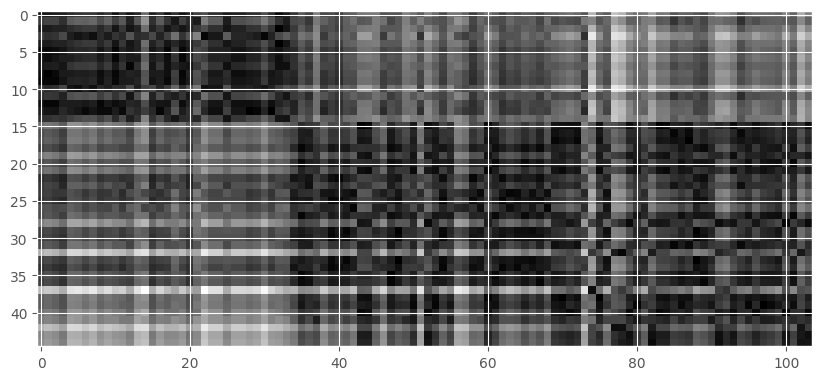

In [ ]:
print( dists.shape)
# We can visualize the distance matrix: each row is a single test example and its distances to training examples",
plt.imshow(dists, interpolation='none')
plt.gray()
#here dark means less distance and light means high distance...

#### Optimization time
If you find spending too much time on these two steps skip them and come back later to speed up your implementation

In [ ]:
from nose.tools import assert_less_equal
feat=[0,1]
knn=KNearestNeighbor(3)
knn.train(Xtrain[:,feat],Ytrain)

dists = knn.compute_distances_two_loops(Xtest[:,feat])
one_loop_dists = knn.compute_distances_one_loop(Xtest[:,feat])
no_loop_dists = knn.compute_distances_no_loops(Xtest[:,feat])

difference = np.linalg.norm(dists - one_loop_dists, ord='fro')
difference_1 = np.linalg.norm(dists - no_loop_dists, ord='fro')

assert_less_equal(difference, 0.001, "Two loops and one loop distance varies")
assert_less_equal(difference_1, 0.001, "Two loops and no loop distance varies")

In [ ]:
from nose.tools import assert_less_equal
import time

feat=[0,1]
knn=KNearestNeighbor(3)
knn.train(Xtrain[:,feat],Ytrain)

start = time.time()
knn.compute_distances_two_loops(Xtest[:,feat])
end = time.time()
two_loops = (end - start)
print ("Two loops took : ",(end - start))

start = time.time()
one_loop = knn.compute_distances_one_loop(Xtest[:,feat])
end = time.time()
one_loop = (end - start)
print ("One loops took : ",(end - start))

start = time.time()
no_loop = knn.compute_distances_no_loops(Xtest[:,feat])
end = time.time()
no_loop = (end - start)
print ("No loops took  : ",(end - start))

assert_less_equal(one_loop, two_loops/10.0)
assert_less_equal(no_loop, one_loop)

Two loops took :  0.05648303031921387
One loops took :  0.0012445449829101562
No loops took  :  0.0006175041198730469


# Testing

In [ ]:
#Lets test it on the set of unseen examples...
pclasses=knn.predict(Xtest[:,feat])

(45, 104)
(45,)


In [ ]:
# print (pclasses)
# print (len(pclasses))

Lets see how good we are doing...
==================

In [ ]:
#Lets see how good we are doing, by finding the accuracy on the test set..
print (np.sum(pclasses==Ytest))
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

34
Accuracy =  0.7555555555555555


In [ ]:
from nose.tools import assert_greater_equal

eat=[0,1]
knn=KNearestNeighbor(3)
knn.train(Xtrain[:,feat],Ytrain)
pclasses=knn.predict(Xtest[:,feat])
acc = np.sum(pclasses==Ytest)/float(Ytest.shape[0])

assert_greater_equal(acc, 0.64)

(45, 104)
(45,)


 Plotting the Decision Surface of Training Set... 
(59400, 104)
(59400,)


/content/tools.py:608: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


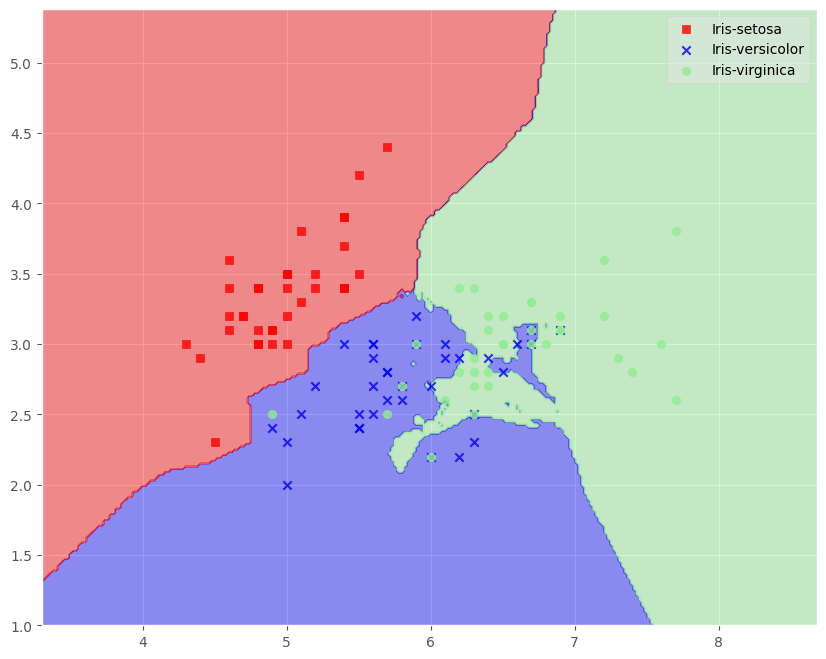

In [ ]:
#Lets plot the decision surface
#%debug
print (" Plotting the Decision Surface of Training Set... ")
t.plot_decision_regions(Xtrain[:,feat],Ytrain,clf=knn, res=0.02, cycle_marker=True, legend=1)

 Plotting the Decision Surface of Test Set... 
(52250, 104)
(52250,)


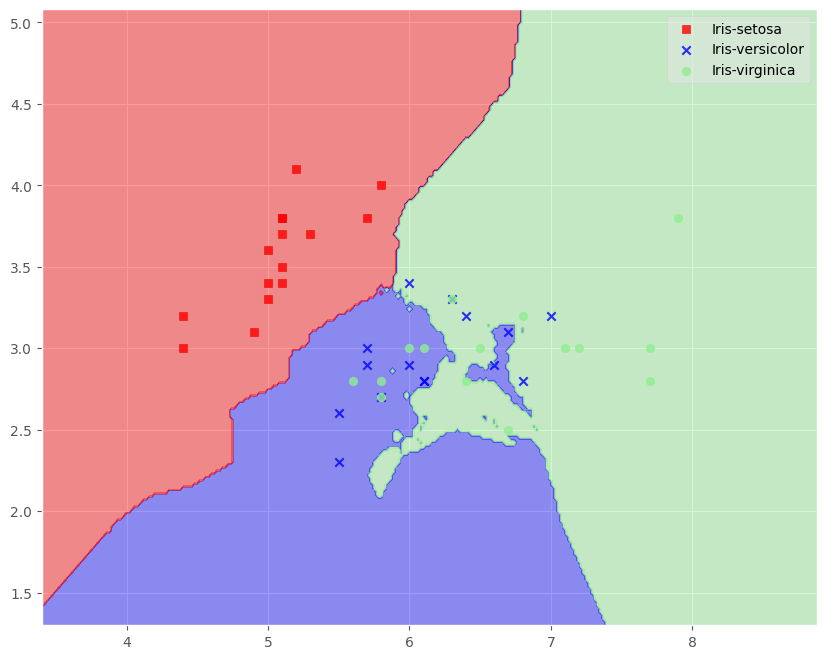

In [ ]:
print (" Plotting the Decision Surface of Test Set... ")
t.plot_decision_regions(Xtest[:,feat],Ytest,clf=knn, res=0.02, cycle_marker=True, legend=1)

# Feature Scaling (or Normalization)

Since we are using Euclidean distance to find the nearest neighbours, which is (as we have seen in the lectures) is heavily influenced by differently scaled features (that features having different scales and ranges). So to make best of K Nearest Neigbhour classifier we will be needed to first scale each feature dimension. Now lets go and write code for the feature scaling in KNearestNeighbour...

In [ ]:
# Lets train a KNN Classifier on Normalized Petal Length and Width
feat=[0,1]
knn=KNearestNeighbor(3,scalefeatures=True) # train a 3-nearest neighbour classifier...

knn.train(Xtrain[:,feat],Ytrain)
#Lets test it on the set of unseen examples...
pclasses=knn.predict(Xtest[:,feat])

print (np.sum(pclasses==Ytest))
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

(45, 104)
(45,)
36
Accuracy =  0.8


 Plotting the Decision Surface of Test Set... 
(52250, 104)
(52250,)


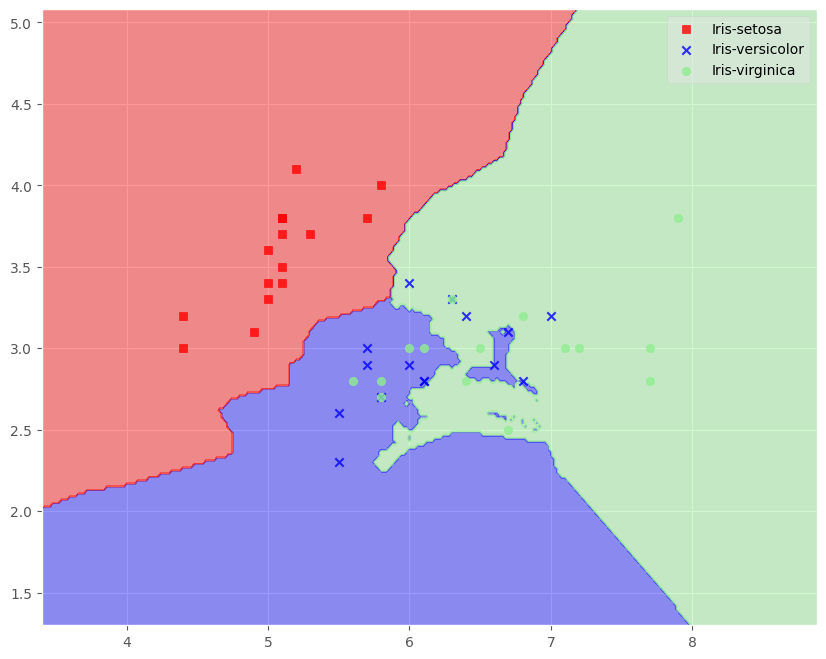

In [ ]:
print (" Plotting the Decision Surface of Test Set... ")
t.plot_decision_regions(Xtest[:,feat],Ytest,clf=knn, res=0.02, cycle_marker=True, legend=1)

# Comment on the effect of feature scaling and normalization.

What is the difference between the results of normalized features and non-normalized features. Why we are seeing the improvement (or decrease) in the accuracy.

# Lets Train on all four features....

In [ ]:
#Lets Train on all four features....

# Lets train a Decision Tree Classifier on Petal Length and Width
feat=[0, 1, 2, 3]
knn=KNearestNeighbor(3)#
knn.train(Xtrain[:,feat],Ytrain)
pclasses=knn.predict(Xtest[:,feat])
#Lets see how good we are doing, by finding the accuracy on the test set..
print (np.sum(pclasses==Ytest))
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

(45, 104)
(45,)
45
Accuracy =  1.0


In [ ]:
from nose.tools import assert_greater_equal

feat=[0, 1, 2, 3]
knn=KNearestNeighbor(3)
knn.train(Xtrain[:,feat],Ytrain)
pclasses=knn.predict(Xtest[:,feat])
acc = np.sum(pclasses==Ytest)/float(Ytest.shape[0])

assert_greater_equal(acc, 0.90)

(45, 104)
(45,)


What can you conclude ?
====================
Please write your observation....



# Cross-Validation

Until now we have been splitting the dataset into a training and test set rather randomly and were reporting a rather artifical performance. Now we are going to test our system exhaustively by making use of k-fold [cross validation](http://en.wikipedia.org/wiki/Cross-validation_%28statistics%29).

Now go and tune your hyper-parameters (K in this case) to opitmize the performance for only first two parameters.

In [ ]:
import time

In [ ]:
# Now lets cross validate for best paramters, and test the result...
# We will be training four different models on four different partitions of data set and
# then will be reporting the mean accuracy of the four classifiers.
stime=time.time()


nfolds=4 # lets use four folds..
folds=t.generate_folds(X,Y,nfolds)
features=[0,1] # features to use for our system
#now lets train and test on these folds...

#Lets perform the grid search...
ks=np.arange(1,20,2) # search the k in the range one to 20...
foldacc=[]

for k in ks:
    fold_acc = []
    for X_train, Y_train, X_val, Y_val in folds:
        knn = KNearestNeighbor(k)
        knn.train(X_train[:, features], Y_train)

        # Test on the validation set
        pclasses = knn.predict(X_val[:, features])
        acc = np.mean(pclasses == Y_val)
        fold_acc.append(acc)

    mean_accuracy = np.mean(fold_acc)
    foldacc.append(mean_accuracy)
    print(f'Mean accuracy for k={k}: {mean_accuracy:.4f}')


# YOUR CODE HERE
# raise NotImplementedError()
bestk = ks[np.argmax(foldacc)]
print(f'Best k: {bestk}')
etime=time.time()

print('\n Total Time Taken ={}'.format(etime-stime))

Generating CV data for 3 classes
(36, 113)
(36,)
(36, 113)
(36,)
(36, 113)
(36,)
(36, 113)
(36,)
Mean accuracy for k=1: 0.6736
(36, 113)
(36,)
(36, 113)
(36,)
(36, 113)
(36,)
(36, 113)
(36,)
Mean accuracy for k=3: 0.6806
(36, 113)
(36,)
(36, 113)
(36,)
(36, 113)
(36,)
(36, 113)
(36,)
Mean accuracy for k=5: 0.7153
(36, 113)
(36,)
(36, 113)
(36,)
(36, 113)
(36,)
(36, 113)
(36,)
Mean accuracy for k=7: 0.7569
(36, 113)
(36,)
(36, 113)
(36,)
(36, 113)
(36,)
(36, 113)
(36,)
Mean accuracy for k=9: 0.8125
(36, 113)
(36,)
(36, 113)
(36,)
(36, 113)
(36,)
(36, 113)
(36,)
Mean accuracy for k=11: 0.7917
(36, 113)
(36,)
(36, 113)
(36,)
(36, 113)
(36,)
(36, 113)
(36,)
Mean accuracy for k=13: 0.7778
(36, 113)
(36,)
(36, 113)
(36,)
(36, 113)
(36,)
(36, 113)
(36,)
Mean accuracy for k=15: 0.7639
(36, 113)
(36,)
(36, 113)
(36,)
(36, 113)
(36,)
(36, 113)
(36,)
Mean accuracy for k=17: 0.7708
(36, 113)
(36,)
(36, 113)
(36,)
(36, 113)
(36,)
(36, 113)
(36,)
Mean accuracy for k=19: 0.7708
Best k: 9

 Total Time

Text(0.5, 1.0, 'Cross Validation Accuracy for different Values of K')

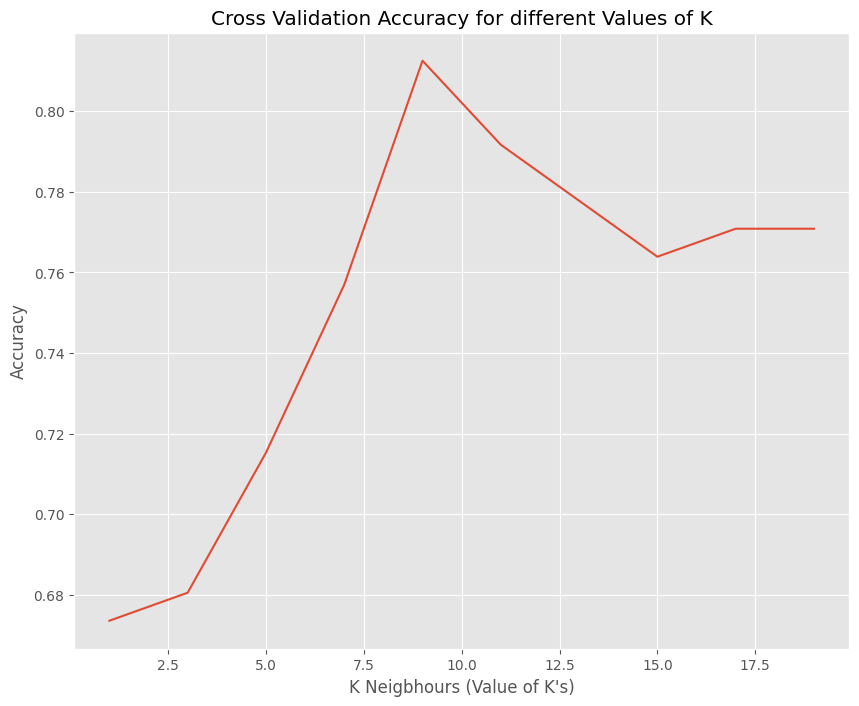

In [ ]:
#Lets plot the accuracy w.r.t K
plt.plot(ks,foldacc)
plt.xlabel('K Neigbhours (Value of K\'s)')
plt.ylabel('Accuracy')
plt.title('Cross Validation Accuracy for different Values of K')

# Lets retrain the classifier with best-k and see its accuracy using only first two features...

In [ ]:
print (bestk)
# bestk = 3

9


In [ ]:
feat=[0,1]
knn=KNearestNeighbor(bestk,scalefeatures=True) # train a kbest-nearest neighbour classifier...
knn.train(Xtrain[:,feat],Ytrain)

#Lets test it on the set of unseen examples...
pclasses=knn.predict(Xtest[:,feat])
#Lets see how good we are doing, by finding the accuracy on the test set..
print (np.sum(pclasses==Ytest))
print ("KNN Accuracy (for best K={}) ={} ".format(bestk,np.sum(pclasses==Ytest)/float(Ytest.shape[0])))

(45, 104)
(45,)
31
KNN Accuracy (for best K=9) =0.6888888888888889 


 Plotting the Decision Surface of Test Set... 
(52250, 104)
(52250,)


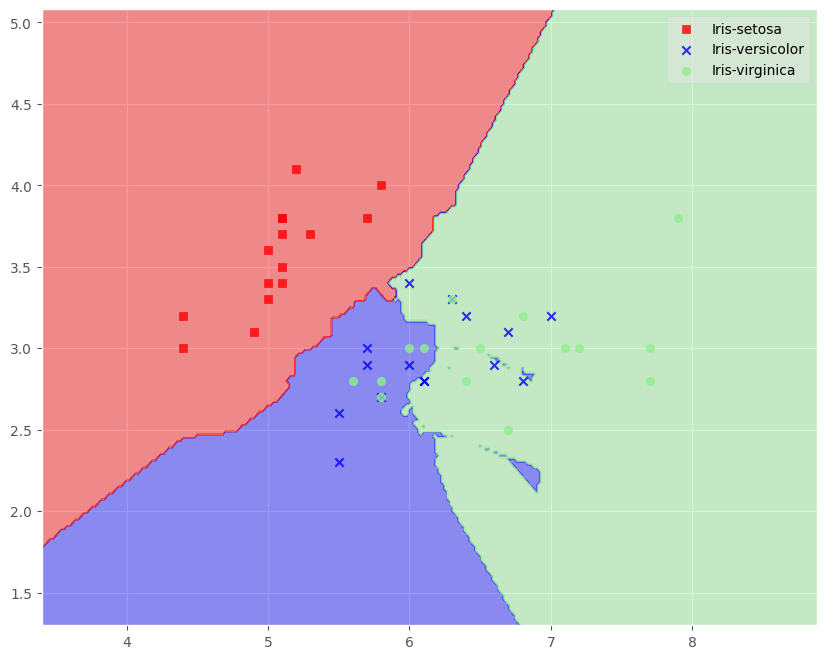

In [ ]:
print (" Plotting the Decision Surface of Test Set... ")
t.plot_decision_regions(Xtest[:,feat],Ytest,clf=knn, res=0.02, cycle_marker=True, legend=1)

This is the true representative accuracy measure of our system. Since, we are removing the selection bias and hence can be much more confidently use the score as a reflection of our system's performance.